In [ ]:

import better 

import numpy as np
from geometry import calculate_positions
from matrix_elements_Pocklington import calculate_impedance_Pocklington
from matrix_elements_Pocklington import calculate_voltage_Pocklington
from visualization import plot_2dmodel

#* Define constants
light_speed, mu0, eps0, frequency = 299792458., 4*np.pi*1e-7, 8.854e-12, 1e6 * 146 #* Also define an operating frequency 
omega = 2 * np.pi * frequency
#* Calculate some parametres of system
wavelength, wavenumber = light_speed / frequency, 2 * np.pi * frequency / light_speed
#* Space resolution of system
delta_z = wavelength/1e3 #! number of sigments for each lambda length

#* set geometry of antenna
source_position = np.array([[0,0,0]], dtype = float)
element_position = np.array([0.0, 0.312, 0.447, 0.699, 1.05, 1.482, 1.986, 2.553, 3.168])
element_length = np.array([1.038, 0.955, 0.956, 0.932, 0.916, 0.906, 0.897, 0.891, 0.887])
wire_radius = 3e-5

incident_field = 10
element_num, R_block, R = calculate_positions(element_length, element_position, frequency, delta_z)
impedance = calculate_impedance_Pocklington(R_block, element_num, wire_radius, delta_z, omega)
voltage_block, voltage = calculate_voltage_Pocklington(R_block, element_num, source_position, incident_field, delta_z)
current = np.linalg.solve(impedance, voltage)

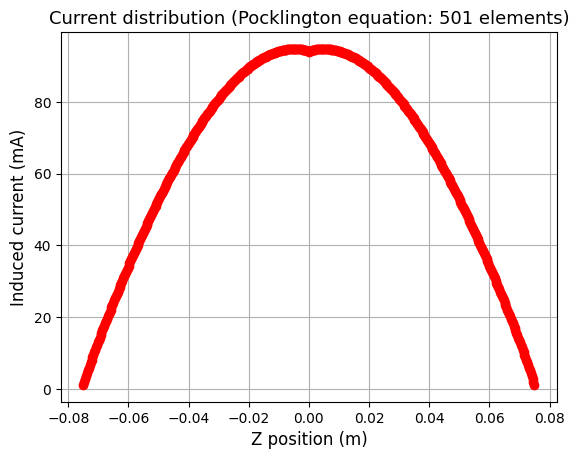

In [2]:
import matplotlib.pyplot as plt
plt.scatter(R[:][:,2], np.abs(current)*1000, color = 'red', zorder = np.inf)
plt.title(f"Current distribution (Pocklington equation: {sum(element_num)} elements)", size = 13)
plt.ylabel("Induced current (mA)", size = 12)
plt.xlabel("Z position (m)", size = 12)
plt.grid(zorder = 0)

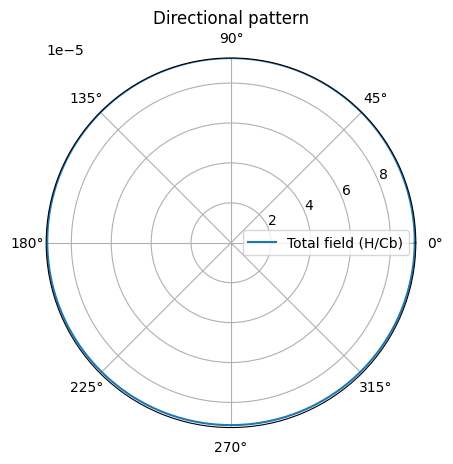

In [3]:
from directional_pattern import calculate_dp
E = calculate_dp(R_block, current, element_length, element_num, delta_z, wavenumber)